https://mikebird28.hatenablog.jp/entry/2018/06/14/172132

これ読んで、kaggleとかで使えんかな？って思ってみた

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

k = 0, f = 1-5


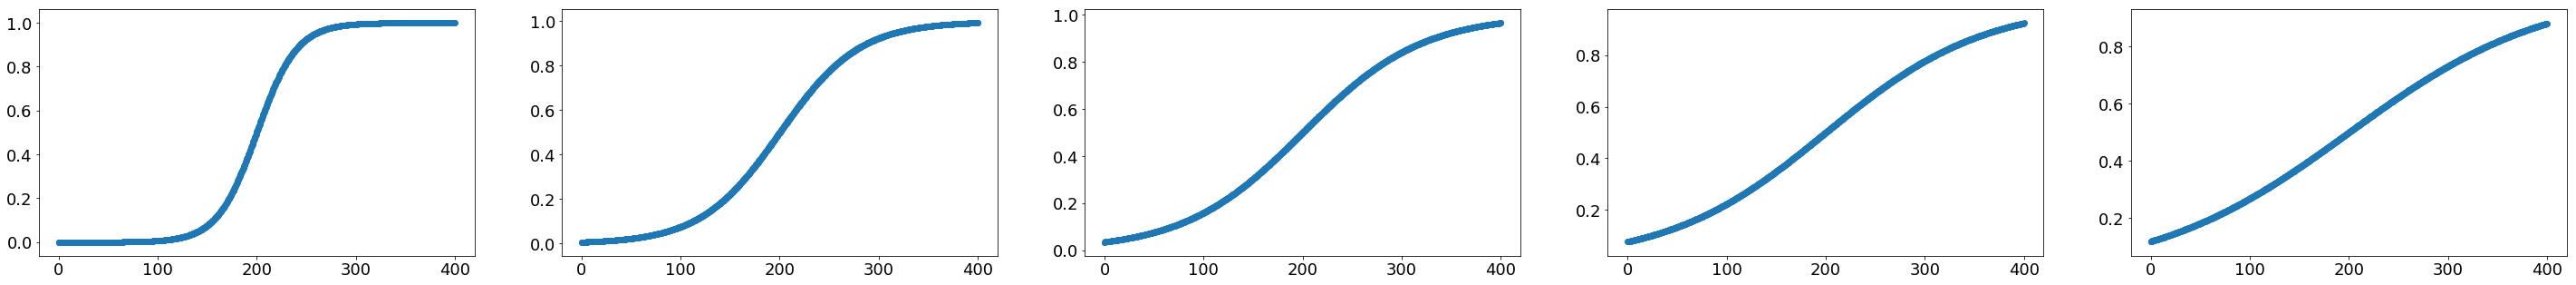

k = 1, f = 1-5


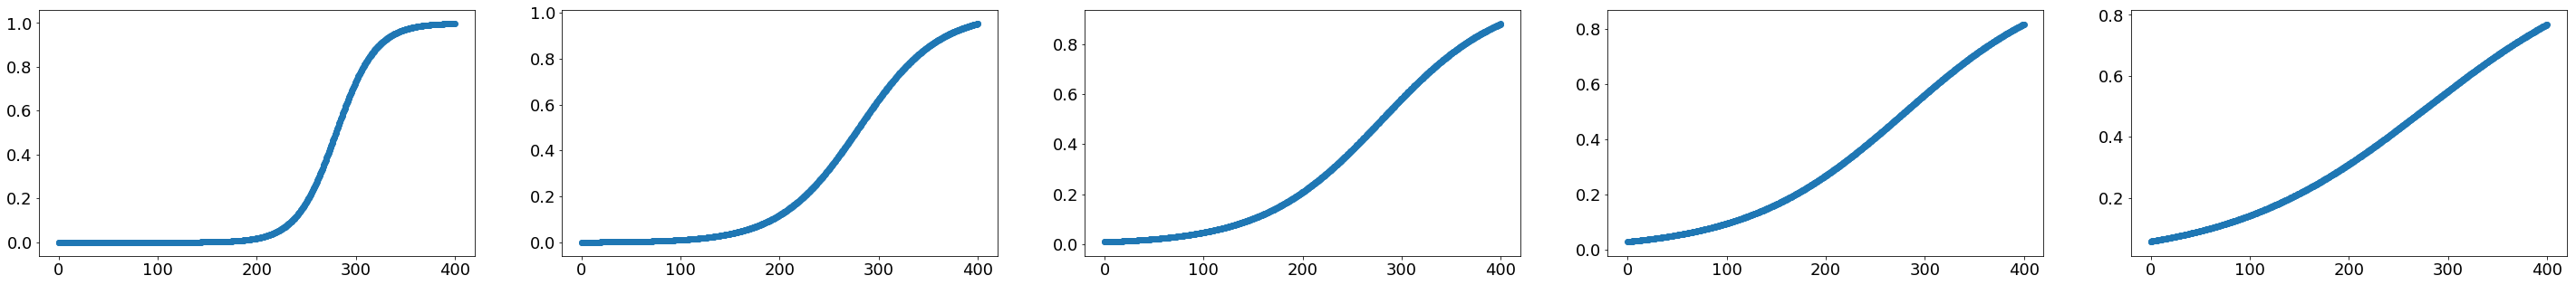

k = 2, f = 1-5


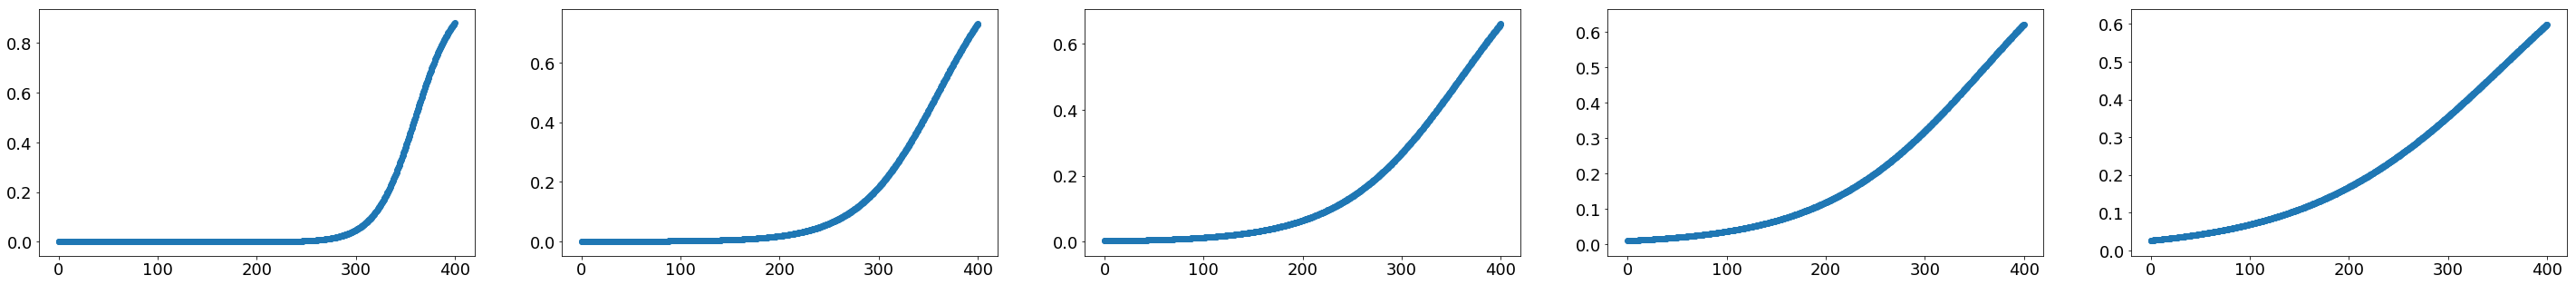

k = 3, f = 1-5


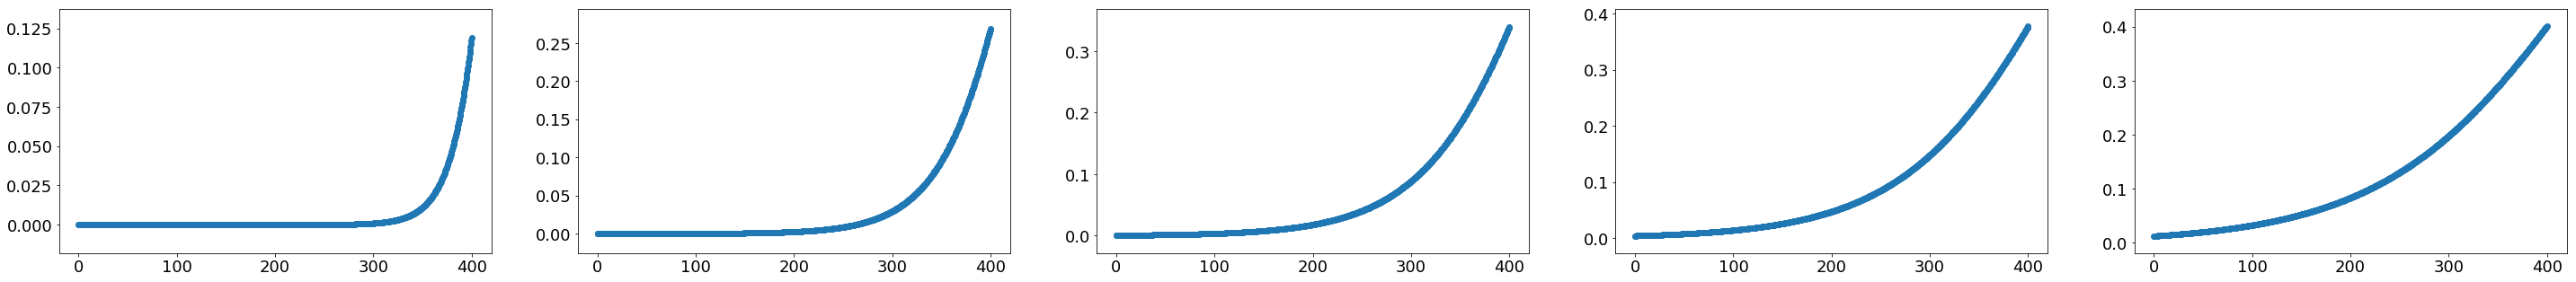

k = 4, f = 1-5


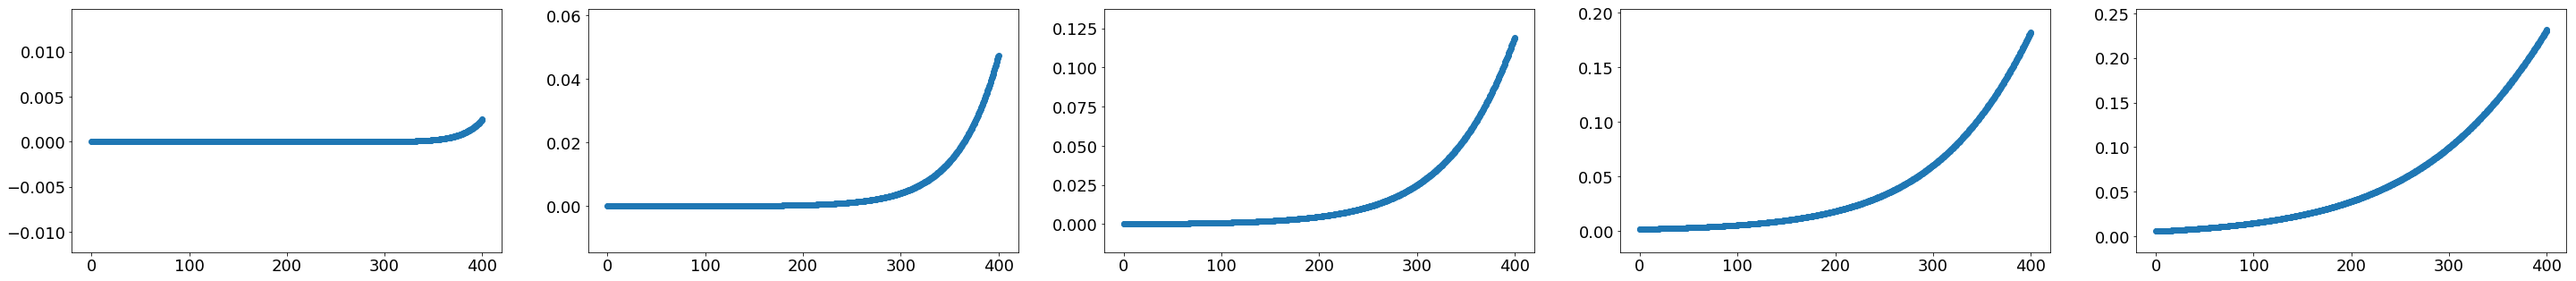

In [2]:
plt.rcParams["font.size"] = 18
def func(ni, k=0, f=1):
    return 1 / (1 + np.exp(-(ni-k)/f))
for k in range(0, 5):
    fig = plt.figure(figsize=(50, 5))
    for f in range(1, 6):
        lst = [fig.add_subplot(1, 5, f)]
#         lst[-1].title('k = {}, f = {}'.format(k, f))
        lst[-1].scatter(np.linspace(0, 400, 1000), func(np.linspace(-50, 50, 1000), 20*k, 5*f))
    print('k = {}, f = 1-5'.format(k))
    plt.show()

- funk()の出力が素のtarget_encoding値と全体のtarget_encding時の値との比率を決める
- kは中心の位置, fはどれだけなめらかに取るかのパラメータ
- n_iはそのカテゴリに属するデータ数なので、
    - ある程度データが多い→素のtarget_encoding値が信頼できそうだからもとの値
    - データが少ない→ばらつきが大きそうだから全体の値で代用
という感じ

- kやfの値もCVとかでサーチしなきゃいけないので、結構大変そう。
- abstを読むと、NNやlogistic回帰で～とか書かれているので、tree系はそれほど効かないかも?(2回分割すれば、その値を取ってこれるし)
- ただ、水準数が多いcategoryの場合、閾値を決めてそれ以下の回数しか登場しないcategorical値はまとめて同じcategoriとして扱ったことがあるのでそれよりはいい結果になるのかな？

In [3]:
def main(n_class = 2, n_data = 100, pos_rate=0.1, seed = 0):
    np.random.seed(seed)
    df = pd.DataFrame({
        'cat_col':[np.random.randint(0, n_class) for i in range(n_data)],
        'target':[int(np.random.rand() < pos_rate) for i in range(n_data)]
        })
    
    target_sum = df['target'].sum()
    df['count'] = df['cat_col'].map(df.groupby('cat_col')['target'].count())
    df['sum_tar'] = df['cat_col'].map(df.groupby('cat_col')['target'].sum())
    df['tar_encoding'] = df['sum_tar'].values / df['count'].values    
    return df

- やりかけ

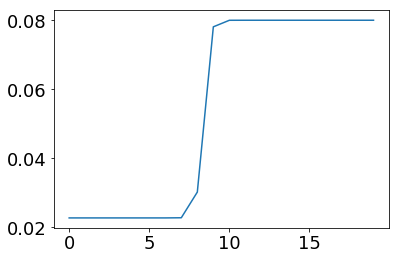

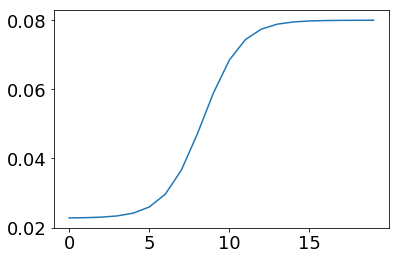

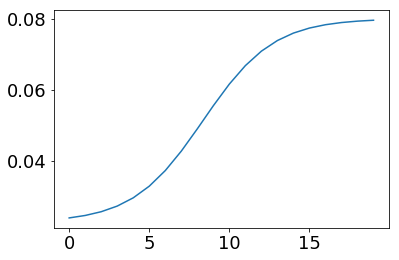

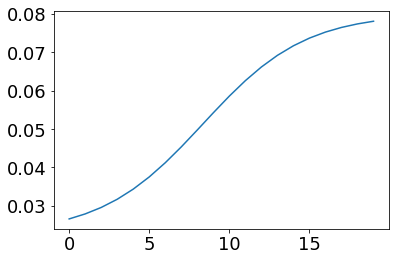

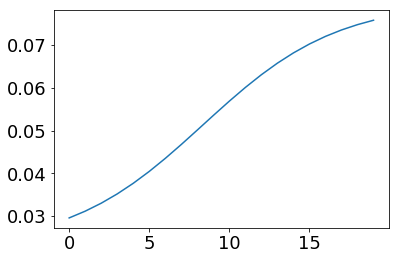

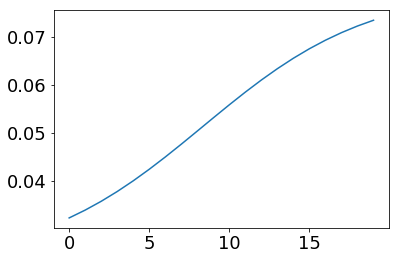

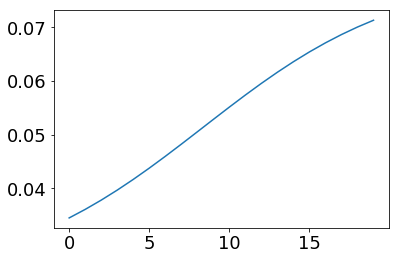

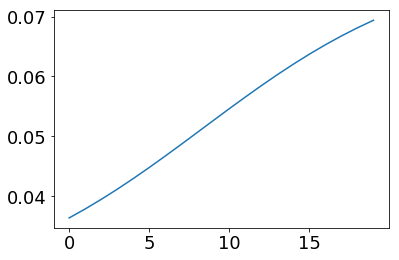

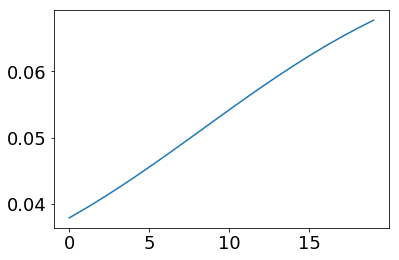

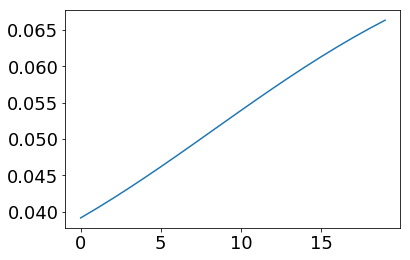

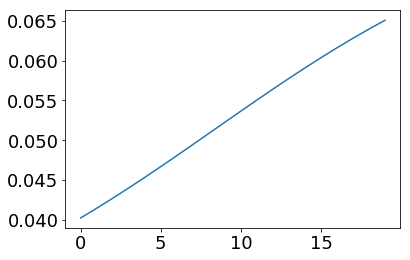

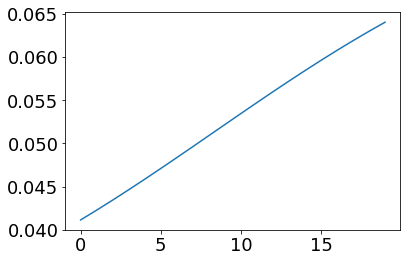

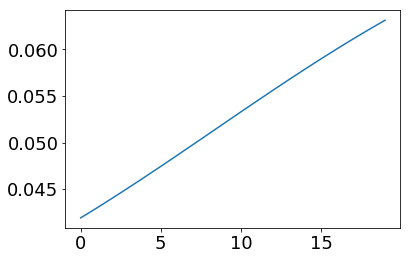

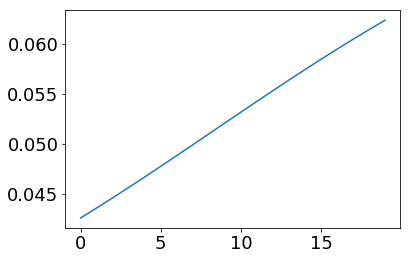

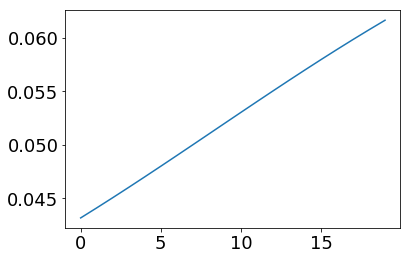

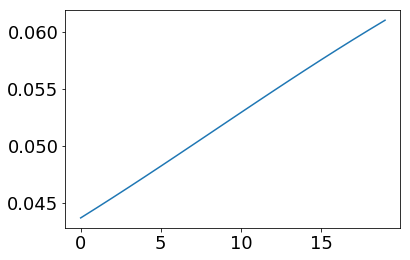

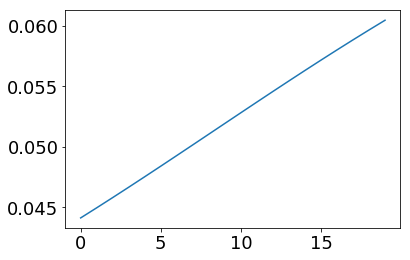

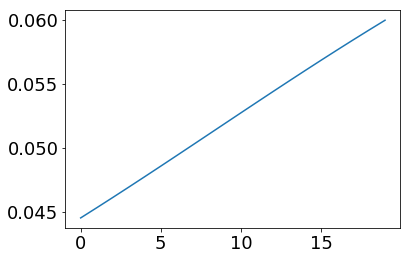

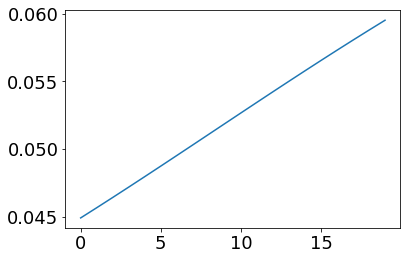

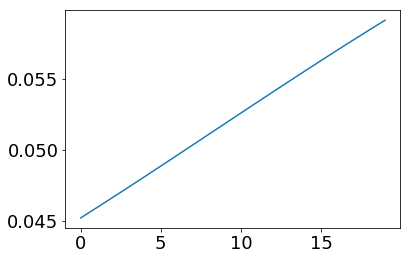

In [4]:
tar_encoding1_list = []
tar_encoding2_list = []


df = main(n_class = 2, n_data = 100, pos_rate=0.1, seed=0)
target_sum = df['target'].sum()
n_data = len(df)
for f in list(np.linspace(1, 101, 20)):
    tar_lst1 = []
    tar_lst2 = []
    
    for k in list(np.linspace(0, 100, 20)):
        df['first_term'] = func(df['count'], k=k, f=f) * df['tar_encoding']
        df['second_term'] = (1 - func(df['count'], k=k, f=f)) * target_sum / n_data
        df['Smooth_target_encoding'] = df['first_term'] + df['second_term']
        tar_lst1.append(df.loc[0, 'tar_encoding'])
        tar_lst2.append(df.loc[0, 'Smooth_target_encoding'])
    tar_encoding1_list.append(tar_lst1)
    tar_encoding2_list.append(tar_lst2)
for i in tar_encoding2_list:
    plt.plot(i)
    plt.show()
    print('='*80)

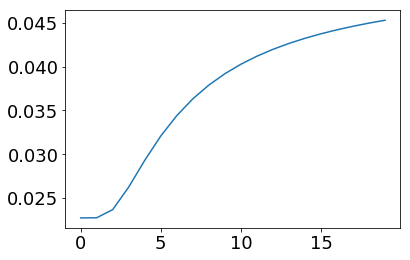

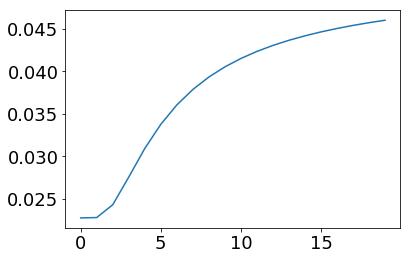

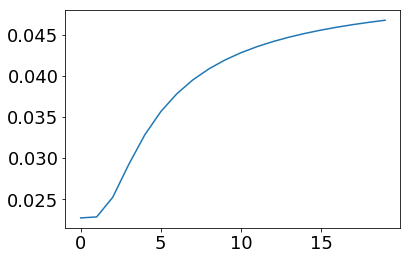

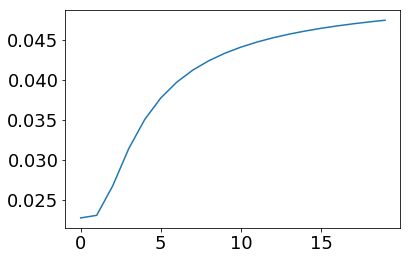

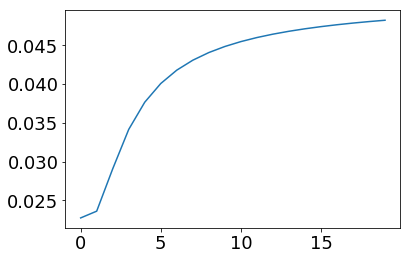

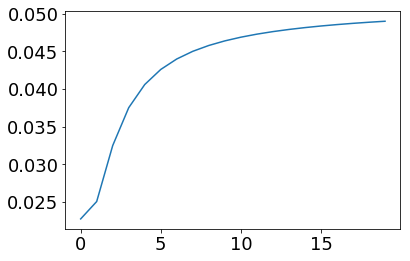

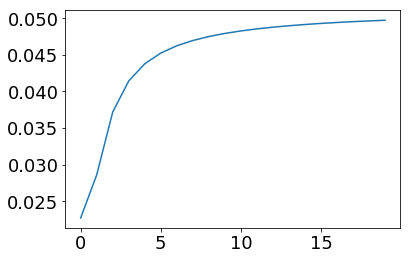

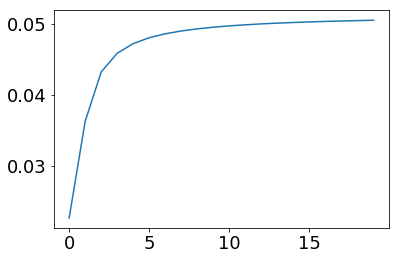

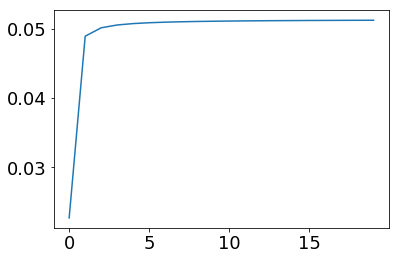

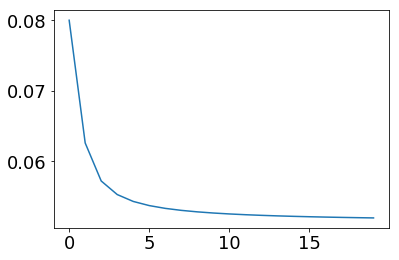

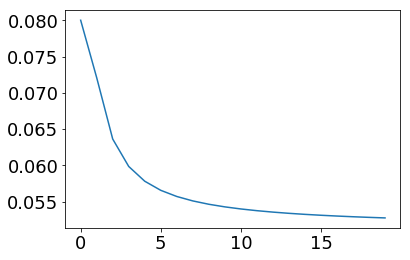

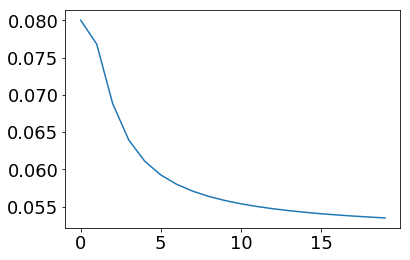

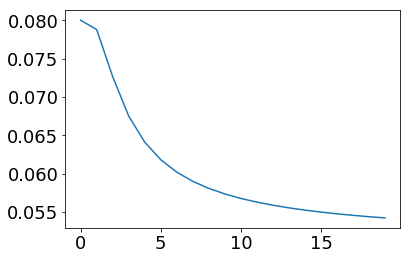

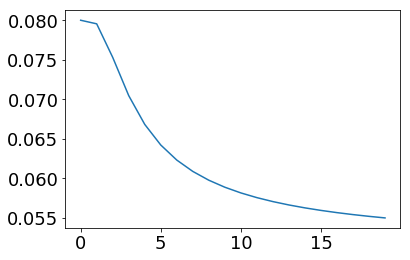

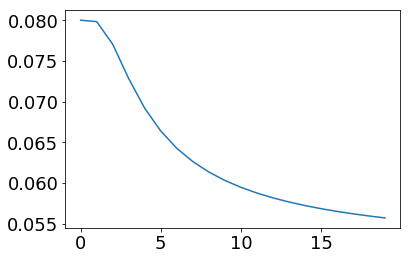

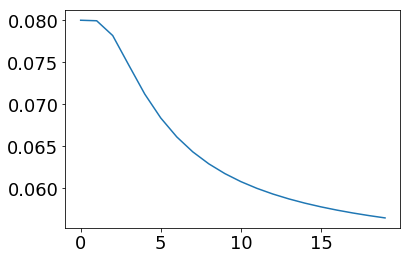

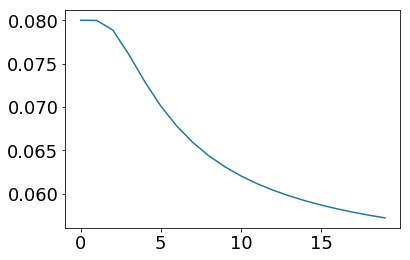

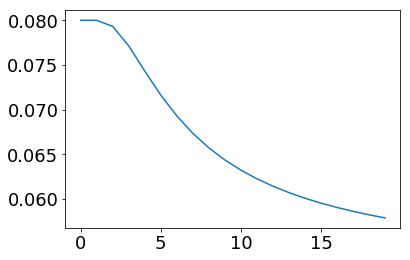

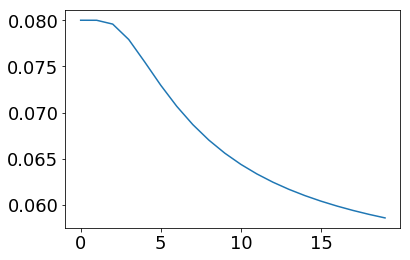

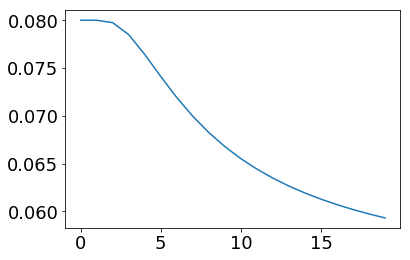

In [5]:
tar_encoding1_list = []
tar_encoding2_list = []


df = main(n_class = 2, n_data = 100, pos_rate=0.1, seed=0)
target_sum = df['target'].sum()
n_data = len(df)
for k in list(np.linspace(1, 101, 20)):
    f_lst = []
    s_lst = []
    tar_lst1 = []
    tar_lst2 = []
    
    for f in list(np.linspace(0, 100, 20)):
        df['first_term'] = func(df['count'], k=k, f=f) * df['tar_encoding']
        df['second_term'] = (1 - func(df['count'], k=k, f=f)) * target_sum / n_data
        df['Smooth_target_encoding'] = df['first_term'] + df['second_term']
        tar_lst1.append(df.loc[0, 'tar_encoding'])
        tar_lst2.append(df.loc[0, 'Smooth_target_encoding'])
    tar_encoding1_list.append(tar_lst1)
    tar_encoding2_list.append(tar_lst2)
    
for i in tar_encoding2_list:
    plt.plot(i)
    plt.show()
    print('='*80)